# Analysis of the global green house emmission over time

### Source of data = "https://ourworldindata.org"

#### Start by importing the modules that are going to be used for the analysis.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sb
import numpy as np

#### Check if the data to be analyzed is in the current directory.

In [23]:
# check the current working directory
# os.getcwd()

In [27]:
# os.chdir("/GIVE_THE_PATH_HERE")

In [28]:
# make sure that the excel file ("Global CO2 Emmission data.xlsx") is there
os.listdir()

['Global CO2 Emmission data.xlsx']

#### Read the content of the excel file into a data frame named "complete_df"

In [29]:
complete_df= pd.read_excel("Global CO2 Emmission data.xlsx")

In [30]:
# To check the type of complete_df, use the type() function
type(complete_df)

pandas.core.frame.DataFrame

In [31]:
# Let's check the content of the data frame using the head() and tail() functions
complete_df.head(5)

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3769828.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.165,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3787706.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.164,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3806634.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.164,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3825655.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.163,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


#### Notice that there are a lot of NaN values at the begining of the table. We will remove these entries later. 

In [32]:
complete_df.tail(5)

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
50593,Zimbabwe,2017,ZWE,14751101.0,2.194784e+10,0.469,0.032,9.596,-0.937,-8.899,...,NaN,0.114,0.001,0.001,0.002,0.0,115.59,28.30,0.910,9.486
50594,Zimbabwe,2018,ZWE,15052191.0,2.271535e+10,0.558,0.037,11.795,2.199,22.920,...,NaN,0.114,0.001,0.001,0.002,0.0,118.22,30.83,0.771,6.537
50595,Zimbabwe,2019,ZWE,15354606.0,NaN,0.570,0.037,11.115,-0.681,-5.772,...,NaN,0.113,0.001,0.001,0.002,0.0,117.96,30.53,0.978,8.795
50596,Zimbabwe,2020,ZWE,15669663.0,NaN,0.570,0.036,10.608,-0.507,-4.559,...,NaN,0.112,0.001,0.001,0.002,0.0,NaN,NaN,1.006,9.481
50597,Zimbabwe,2021,ZWE,15993525.0,NaN,0.570,0.036,11.296,0.688,6.488,...,NaN,0.111,0.001,0.001,0.002,0.0,NaN,NaN,NaN,NaN


#### Assess the dimensions and the column names of the dataframe 

In [33]:
# Let's check the dimensions of the dataframe
complete_df.shape

(50598, 79)

In [34]:
# Let's look at the names of the 79 columns to choose the ones that we are interested in
complete_df.columns[0:25]

Index(['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2',
       'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct',
       'co2_including_luc', 'co2_including_luc_growth_abs',
       'co2_including_luc_growth_prct', 'co2_including_luc_per_capita',
       'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy',
       'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2',
       'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita',
       'consumption_co2_per_gdp', 'cumulative_cement_co2'],
      dtype='object')

#### Filter the dataframe to extract only the colums of interest

In [35]:
# Let's extract only the columns of interest and save it as "df"
df = complete_df[['country','year', 'population', 'gdp', 'co2', 'methane','nitrous_oxide']]
df.head()

,country,year,population,gdp,co2,methane,nitrous_oxide
0,Afghanistan,1850,3752993.0,NaN,NaN,NaN,NaN
1,Afghanistan,1851,3769828.0,NaN,NaN,NaN,NaN
2,Afghanistan,1852,3787706.0,NaN,NaN,NaN,NaN
3,Afghanistan,1853,3806634.0,NaN,NaN,NaN,NaN
4,Afghanistan,1854,3825655.0,NaN,NaN,NaN,NaN


#### Let's see how many unique countries there are in the data frame

In [36]:
len(df.country.unique())

278

#### Note that 278 more than the total number of countries in the world. So, let's list the counries to inspect this further.

In [37]:
df.country.unique()[0:30]

array(['Afghanistan', 'Africa', 'Africa (GCP)', 'Aland Islands',
       'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola',
       'Anguilla', 'Antarctica', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Asia', 'Asia (GCP)',
       'Asia (excl. China and India)', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda'], dtype=object)

#### We see that the dataframe also contains continents, economic regions etc in addition to countries. 
#### Let's remove all entries other than countries from the dataframe. We wil do this in a couple of steps:

#### Step1:  Let's make the "country" column the index of the dataframe and check the dataframe

In [38]:
df.set_index("country", inplace =True)

In [39]:
df.head(5)

,year,population,gdp,co2,methane,nitrous_oxide
country,,,,,,
Afghanistan,1850,3752993.0,NaN,NaN,NaN,NaN
Afghanistan,1851,3769828.0,NaN,NaN,NaN,NaN
Afghanistan,1852,3787706.0,NaN,NaN,NaN,NaN
Afghanistan,1853,3806634.0,NaN,NaN,NaN,NaN
Afghanistan,1854,3825655.0,NaN,NaN,NaN,NaN


In [40]:
df.shape

(50598, 6)

In [41]:
df.index

Index(['Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan',
       'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan',
       'Afghanistan', 'Afghanistan',
       ...
       'Zimbabwe', 'Zimbabwe', 'Zimbabwe', 'Zimbabwe', 'Zimbabwe', 'Zimbabwe',
       'Zimbabwe', 'Zimbabwe', 'Zimbabwe', 'Zimbabwe'],
      dtype='object', name='country', length=50598)

In [42]:
df.shape

(50598, 6)

#### Step 2: Let's extract the data only for countries (excluding countinents, regions, grouped income countries etc)

In [43]:

drop_list = set(["Upper-middle-income countries", "High-income countries", 'Africa (GCP)', 'Asia (excl. China and India)', 
             "World","Asia (GCP)", 'Antarctica', 'Oceania', 'Oceania (GCP)',
             "Europe", "Europe (GCP)", 'Europe (excl. EU-27)','Europe (excl. EU-28)', 'European Union (27)',
             'European Union (27) (GCP)', 'European Union (28)',
             "Reunion", 'French Equatorial Africa (GCP)', 'South America (GCP)',
             "Lower-middle-income countries",'Least developed countries (Jones et al. 2023)',
             "Low-income countries",'Leeward Islands (Jones et al. 2023)',
             "Least developed countries (Jones et al. 2023)",'Low-income countries',
             'Panama Canal Zone (GCP)','Panama Canal Zone (Jones et al. 2023)',
             'Ryukyu Islands (GCP)', 'Ryukyu Islands (Jones et al. 2023)', 
             "French West Africa (Jones et al. 2023)", 'St. Kitts-Nevis-Anguilla (GCP)',
             "OECD (Jones et al. 2023)", "Middle East (GCP)", "Non-OECD (GCP)",
             "North America",'Kuwaiti Oil Fires (GCP)', 'Kuwaiti Oil Fires (Jones et al. 2023)',
             "Central America (GCP)","OECD (GCP)",'North America', 'North America (GCP)',
            'North America (excl. USA)', "South America", 'Kuwaiti Oil Fires (Jones et al. 2023)', 
             "Africa", "Panama Canal Zone (Jones et al. 2023)", "Panama Canal Zone (GCP)",
             "Asia", "International transport", "French Equatorial Africa (Jones et al. 2023)", 
            "St. Kitts-Nevis-Anguilla (Jones et al. 2023)", "South America (GCP)"
            ])
print(type(drop_list))
drop_list= list(drop_list)
print(type(drop_list))

<class 'set'>
<class 'list'>


In [44]:
# Let's check the number of items to be removed from the dataframe

len(drop_list)

45

#### Check if the drop_list contains the entries that we want to remove. Check to 10 items

In [45]:
for country in drop_list[1:11]:
    print(country)

OECD (GCP)
Reunion
European Union (27)
Kuwaiti Oil Fires (GCP)
North America (excl. USA)
Europe (excl. EU-28)
St. Kitts-Nevis-Anguilla (Jones et al. 2023)
European Union (27) (GCP)
Kuwaiti Oil Fires (Jones et al. 2023)
Least developed countries (Jones et al. 2023)


#### Step 3: Use the df.drop() function to remove entries in the drop_list and check the dimension of the df

In [46]:
df = df.drop(drop_list, axis = 0)

In [47]:
df.shape

(41886, 6)

#### Note that we have dropped 8712 rows from the dataframe. 

In [48]:
# Now, let reset the index 
df.reset_index(inplace=True)

In [49]:
# check the column names
df.columns

Index(['country', 'year', 'population', 'gdp', 'co2', 'methane',
       'nitrous_oxide'],
      dtype='object')

In [50]:
df.head()

,country,year,population,gdp,co2,methane,nitrous_oxide
0,Afghanistan,1850,3752993.0,NaN,NaN,NaN,NaN
1,Afghanistan,1851,3769828.0,NaN,NaN,NaN,NaN
2,Afghanistan,1852,3787706.0,NaN,NaN,NaN,NaN
3,Afghanistan,1853,3806634.0,NaN,NaN,NaN,NaN
4,Afghanistan,1854,3825655.0,NaN,NaN,NaN,NaN


#### Let's check if some of the items that we wanted to drop (E.g. Europe, World) are in the dataframe or not. 

In [51]:
df[df['country']=='Europe']

,country,year,population,gdp,co2,methane,nitrous_oxide


In [52]:
df[df['country']=='World']

,country,year,population,gdp,co2,methane,nitrous_oxide


#### We have successfully dropped the rows corresponding to the items in the drop_list!

## Preliminary inspection of the dataframe

In [53]:
# Lets inspect the datatypes using the .info() function 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41886 entries, 0 to 41885
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        41886 non-null  object 
 1   year           41886 non-null  int64  
 2   population     37197 non-null  float64
 3   gdp            14548 non-null  float64
 4   co2            24425 non-null  float64
 5   methane        5790 non-null   float64
 6   nitrous_oxide  5790 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.2+ MB


In [54]:
# Check the dimension of the data
df.shape

(41886, 7)

### Removing NA/NaN values

In [55]:
# Before we continue with our analysis, let's remove the NA and NaN values from our dataframe
df = df.dropna()
df.shape

(4667, 7)

## Descriptive Statistics

In [56]:
# Let's conduct a a preliminary descriptive analysis of the data using the .describe()function
df.describe()

,year,population,gdp,co2,methane,nitrous_oxide
count,4667.000000,4.667000e+03,4.667000e+03,4667.000000,4667.000000,4667.000000
mean,2004.005357,3.966570e+07,4.517952e+11,172.803726,44.943094,16.189102
std,8.365279,1.392002e+08,1.511201e+12,714.540193,117.439841,45.120114
min,1990.000000,6.817100e+04,2.571720e+08,0.000000,0.010000,0.000000
25%,1997.000000,3.550387e+06,1.757572e+10,3.093000,3.980000,1.290000
50%,2004.000000,9.467384e+06,5.421742e+10,16.507000,11.210000,4.500000
75%,2011.000000,2.687995e+07,2.689692e+11,76.182000,34.800000,13.545000
max,2018.000000,1.417069e+09,1.815162e+13,10353.877000,1161.420000,552.670000


#### The analysis indicates a couple of important insights (E.g. the mean, std, min, max) that we can use before exploring the data more


In [57]:
df.head()

,country,year,population,gdp,co2,methane,nitrous_oxide
140,Afghanistan,1990,10694804.0,1.306598e+10,2.024,6.74,2.84
141,Afghanistan,1991,10745168.0,1.204736e+10,1.914,7.02,2.93
142,Afghanistan,1992,12057436.0,1.267754e+10,1.482,7.13,2.89
143,Afghanistan,1993,14003764.0,9.834581e+09,1.487,7.21,2.93
144,Afghanistan,1994,15455560.0,7.919857e+09,1.454,7.47,2.76


In [58]:
df.year.max()

2018

## Question 1: Which countries are the top CO2 emmitters in 2018

In [59]:
top_2018_emitters = df[df.year == 2018].sort_values(by='co2', ascending=False, ignore_index=True).head(10)
top_2018_emitters= top_2018_emitters[['country', 'year', 'population', 'co2','methane', 'nitrous_oxide']]
top_2018_emitters

,country,year,population,co2,methane,nitrous_oxide
0,China,2018,1.417069e+09,10353.877,1159.28,545.19
1,United States,2018,3.321400e+08,5376.657,710.57,268.55
2,India,2018,1.369003e+09,2600.447,657.15,265.59
3,Russia,2018,1.456523e+08,1700.453,673.31,64.67
4,Japan,2018,1.262559e+08,1143.412,27.93,18.81
5,Germany,2018,8.289670e+07,754.408,49.85,33.12
6,Iran,2018,8.561756e+07,700.938,239.79,36.59
7,South Korea,2018,5.167690e+07,670.169,22.84,10.31
8,Saudi Arabia,2018,3.501813e+07,626.191,112.30,8.07
9,Indonesia,2018,2.670668e+08,603.657,327.29,98.37


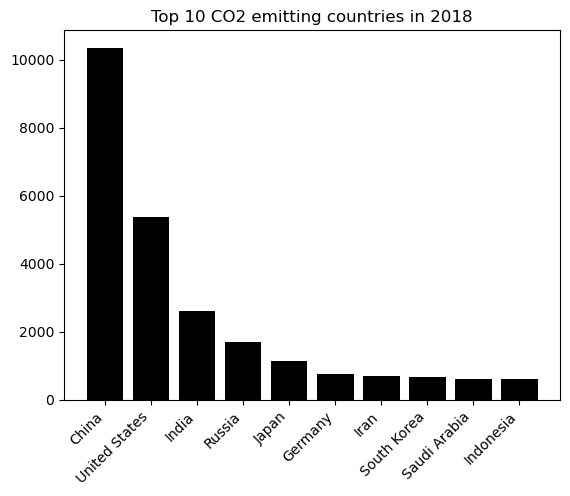

In [60]:
plt.bar(top_2018_emitters.country, top_2018_emitters.co2,color="black")
plt.title("Top 10 CO2 emitting countries in 2018")
plt.xticks(rotation=45, ha= 'right')
#plt.xlabel('Country')
#plt.ylabel('co2')
plt.show()

## Question 2: What is the trend of greenhouse gas emission over time for the top  5 countries?

In [61]:
# let's first extract the top 10 countries from the top_2018_emitters dataframe
top10_countries = list(top_2018_emitters['country'])
top10_countries

['China',
 'United States',
 'India',
 'Russia',
 'Japan',
 'Germany',
 'Iran',
 'South Korea',
 'Saudi Arabia',
 'Indonesia']

In [62]:
overtime = [df[df['country']==country] for country in top10_countries]

In [63]:
overtime[0].head(5)

,country,year,population,gdp,co2,methane,nitrous_oxide
7891,China,1990,1.153704e+09,3.385122e+12,2484.855,765.84,296.17
7892,China,1991,1.170626e+09,3.508948e+12,2606.096,775.53,303.72
7893,China,1992,1.183813e+09,3.755037e+12,2730.788,781.19,309.60
7894,China,1993,1.195856e+09,4.126170e+12,2921.651,790.54,301.41
7895,China,1994,1.207287e+09,4.438753e+12,3100.002,812.96,314.95


In [64]:
type(overtime[0])

pandas.core.frame.DataFrame

In [65]:
top10_overtime = pd.DataFrame(columns = 
                              ['country', 
                               'year', 
                               'population', 
                               'gdp', 
                               'co2', 
                               'methane', 
                               'nitrous_oxide'])

In [66]:
my_list = []
for index, item in enumerate(overtime): 
    data = item
    my_list.append(data)
top10_overtime = pd.concat(my_list)

In [67]:
top10_overtime

,country,year,population,gdp,co2,methane,nitrous_oxide
7891,China,1990,1.153704e+09,3.385122e+12,2484.855,765.84,296.17
7892,China,1991,1.170626e+09,3.508948e+12,2606.096,775.53,303.72
7893,China,1992,1.183813e+09,3.755037e+12,2730.788,781.19,309.60
7894,China,1993,1.195856e+09,4.126170e+12,2921.651,790.54,301.41
7895,China,1994,1.207287e+09,4.438753e+12,3100.002,812.96,314.95
...,...,...,...,...,...,...,...
17670,Indonesia,2014,2.562298e+08,2.526853e+12,487.890,391.81,88.02
17671,Indonesia,2015,2.590920e+08,2.650203e+12,539.149,403.76,88.89
17672,Indonesia,2016,2.618502e+08,2.783165e+12,552.651,287.13,88.85
17673,Indonesia,2017,2.644988e+08,2.924271e+12,567.255,283.83,94.83


In [68]:
top10_overtime.country.unique()

array(['China', 'United States', 'India', 'Russia', 'Japan', 'Germany',
       'Iran', 'South Korea', 'Saudi Arabia', 'Indonesia'], dtype=object)

Text(0.5, 1.0, 'Trend of CO2 emission overtime by the top 5 countries')

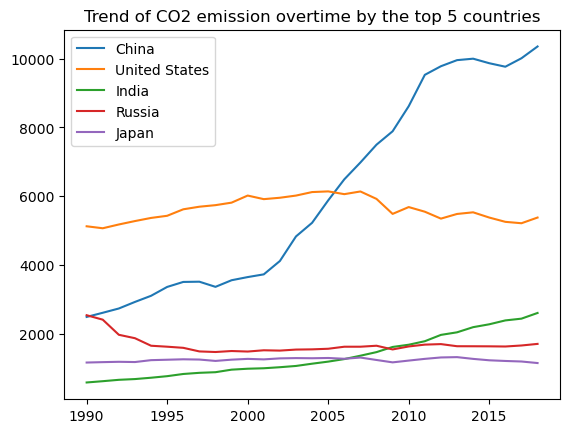

In [69]:
plt.plot('year', 'co2', data=top10_overtime[top10_overtime.country=="China"])
plt.plot('year', 'co2', data=top10_overtime[top10_overtime.country=="United States"])
plt.plot('year', 'co2', data=top10_overtime[top10_overtime.country=="India"])
plt.plot('year', 'co2', data=top10_overtime[top10_overtime.country=="Russia"])
plt.plot('year', 'co2', data=top10_overtime[top10_overtime.country=="Japan"])
plt.legend(["China", "United States", "India", "Russia", "Japan"])
plt.title("Trend of CO2 emission overtime by the top 5 countries")

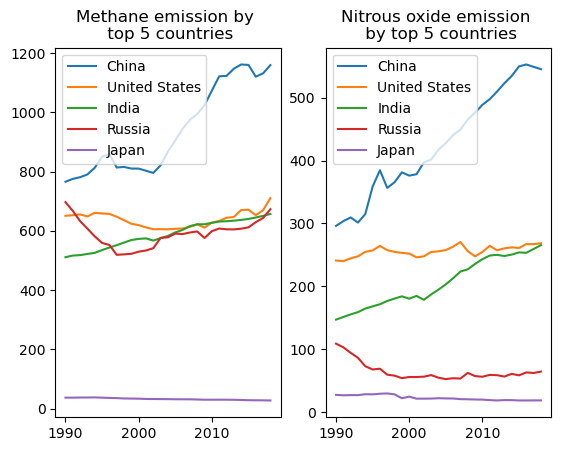

In [70]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.plot('year', 'methane', data=top10_overtime[top10_overtime.country=="China"])
ax1.plot('year', 'methane', data=top10_overtime[top10_overtime.country=="United States"])
ax1.plot('year', 'methane', data=top10_overtime[top10_overtime.country=="India"])
ax1.plot('year', 'methane', data=top10_overtime[top10_overtime.country=="Russia"])
ax1.plot('year', 'methane', data=top10_overtime[top10_overtime.country=="Japan"])
ax1.set_title("Methane emission by \n top 5 countries")
ax1.legend(["China", "United States", "India", "Russia", "Japan"])
ax2.plot('year', 'nitrous_oxide', data=top10_overtime[top10_overtime.country=="China"])
ax2.plot('year', 'nitrous_oxide', data=top10_overtime[top10_overtime.country=="United States"])
ax2.plot('year', 'nitrous_oxide', data=top10_overtime[top10_overtime.country=="India"])
ax2.plot('year', 'nitrous_oxide', data=top10_overtime[top10_overtime.country=="Russia"])
ax2.plot('year', 'nitrous_oxide', data=top10_overtime[top10_overtime.country=="Japan"])
ax2.set_title("Nitrous oxide emission \n by top 5 countries")
ax2.legend(["China", "United States", "India", "Russia", "Japan"])

## Question 3: Is there any relationship between GDP and CO2 emission?

In [71]:
df.head()

,country,year,population,gdp,co2,methane,nitrous_oxide
140,Afghanistan,1990,10694804.0,1.306598e+10,2.024,6.74,2.84
141,Afghanistan,1991,10745168.0,1.204736e+10,1.914,7.02,2.93
142,Afghanistan,1992,12057436.0,1.267754e+10,1.482,7.13,2.89
143,Afghanistan,1993,14003764.0,9.834581e+09,1.487,7.21,2.93
144,Afghanistan,1994,15455560.0,7.919857e+09,1.454,7.47,2.76


[Text(0.5, 1.0, 'Relationship between gdp and co2 emission')]

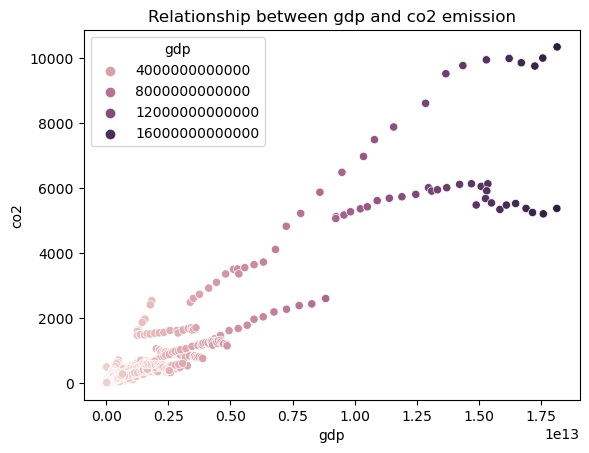

In [72]:
sb.scatterplot(x='gdp', y='co2', data = df, hue='gdp').set(title="Relationship between gdp and co2 emission")

### Conclusion: Yes, the data indicate that, overall, countries with higher gdp contribute more to CO2 emission. 

## Question 4: Are the emissions of Greenhouse gases correlated with each other?

[Text(0.5, 1.0, 'Relationship between nitrous oxide and co2 emission')]

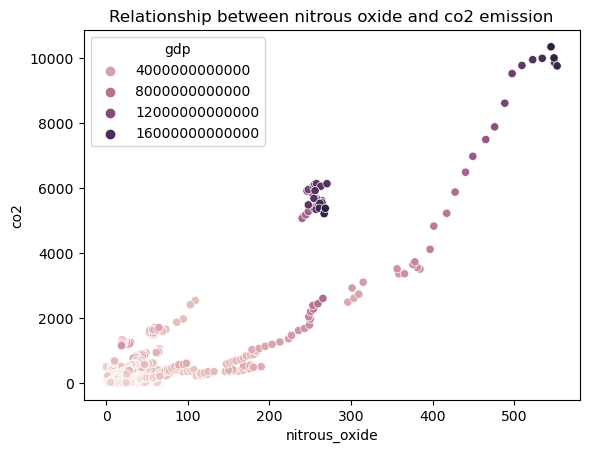

In [78]:
sb.scatterplot(x='nitrous_oxide', y='co2', 
               data = df, hue='gdp').set(title="Relationship between nitrous oxide and co2 emission")

[Text(0.5, 1.0, 'Relationship between methane and co2 emission')]

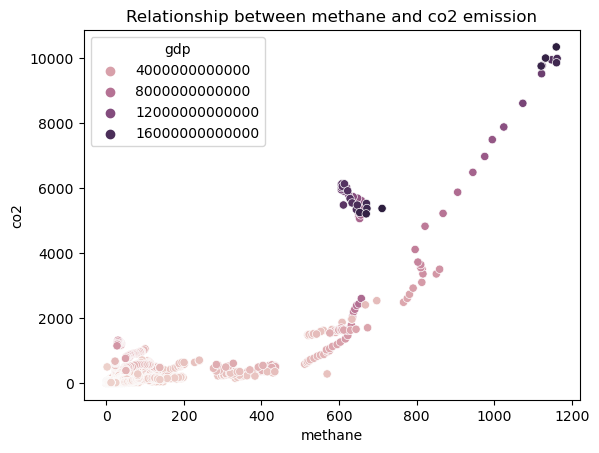

In [79]:
sb.scatterplot(x='methane', y='co2', 
               data = df, hue='gdp').set(title="Relationship between methane and co2 emission")

[Text(0.5, 1.0, 'Relationship between nitrous oxide and methane emission')]

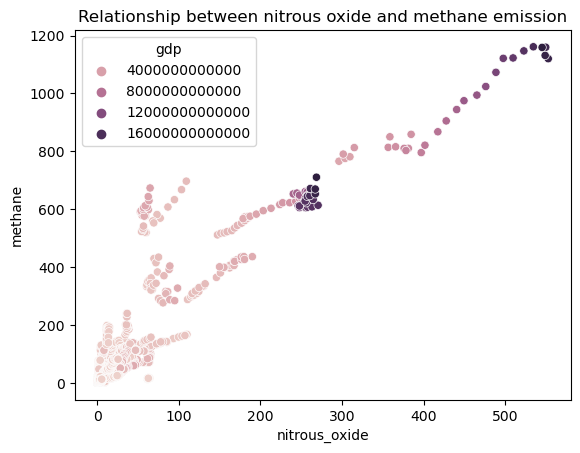

In [80]:
sb.scatterplot(x='nitrous_oxide', y='methane', 
               data = df, hue='gdp').set(title="Relationship between nitrous oxide and methane emission")

### Conclusion: Yes, it seems possible to conclude that the emission of the greenhouse gasses is correlated. 